In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train = pd.read_csv("Train (4).csv")

In [3]:
test = pd.read_csv("Test (1).csv")

In [4]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [8]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [10]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

In [11]:
test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10081    False
10082    False
10083    False
10084    False
10085    False
Length: 10086, dtype: bool

In [12]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [13]:
test.describe()

,year,household_size,age_of_respondent
count,10086.000000,10086.000000,10086.000000
mean,2016.975907,3.778802,38.308348
std,0.847356,2.212721,16.270053
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,20.000000,100.000000


In [14]:
train['uniqueid'].unique()

array(['uniqueid_1', 'uniqueid_2', 'uniqueid_3', ..., 'uniqueid_8757',
       'uniqueid_8758', 'uniqueid_8759'], dtype=object)

In [15]:

# Add rows
combined = pd.concat([train,test], ignore_index=True)

print(combined)


      country  year       uniqueid bank_account location_type  \
0       Kenya  2018     uniqueid_1          Yes         Rural   
1       Kenya  2018     uniqueid_2           No         Rural   
2       Kenya  2018     uniqueid_3          Yes         Urban   
3       Kenya  2018     uniqueid_4           No         Rural   
4       Kenya  2018     uniqueid_5           No         Urban   
...       ...   ...            ...          ...           ...   
33605  Uganda  2018  uniqueid_2998          NaN         Rural   
33606  Uganda  2018  uniqueid_2999          NaN         Urban   
33607  Uganda  2018  uniqueid_3000          NaN         Urban   
33608  Uganda  2018  uniqueid_3001          NaN         Rural   
33609  Uganda  2018  uniqueid_3002          NaN         Urban   

      cellphone_access  household_size  age_of_respondent  \
0                  Yes               3                 24   
1                   No               5                 70   
2                  Yes              

In [16]:
df=combined

In [17]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   uniqueid                33610 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           33610 non-null  object
 5   cellphone_access        33610 non-null  object
 6   household_size          33610 non-null  int64 
 7   age_of_respondent       33610 non-null  int64 
 8   gender_of_respondent    33610 non-null  object
 9   relationship_with_head  33610 non-null  object
 10  marital_status          33610 non-null  object
 11  education_level         33610 non-null  object
 12  job_type                33610 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.3+ MB


In [19]:
df.drop(columns=['uniqueid'], inplace=True)



In [20]:
df

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
33605,Uganda,2018,NaN,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
33606,Uganda,2018,NaN,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
33607,Uganda,2018,NaN,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
33608,Uganda,2018,NaN,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [21]:
# Clean up marital_status values
df["marital_status"] = df["marital_status"].str.strip().str.lower()

# Replace with standardized categories
df["marital_status"] = df["marital_status"].replace({
    "married/living together": "married",
    "widowed": "widowed",
    "single/never married": "single",
    "divorced/seperated": "divorced",   # fixing the spelling
    "dont know": "unknown"
})


In [22]:
df["marital_status"].unique()


array(['married', 'widowed', 'single', 'divorced', 'unknown'],
      dtype=object)

In [23]:
df

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,married,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,single,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,married,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,single,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
33605,Uganda,2018,NaN,Rural,No,2,62,Female,Spouse,married,Primary education,Self employed
33606,Uganda,2018,NaN,Urban,Yes,8,42,Male,Head of Household,married,Primary education,Self employed
33607,Uganda,2018,NaN,Urban,Yes,1,39,Male,Head of Household,single,Secondary education,Other Income
33608,Uganda,2018,NaN,Rural,Yes,6,28,Female,Spouse,married,Primary education,Self employed


In [24]:
df['bank_account'].unique()

array(['Yes', 'No', nan], dtype=object)

In [25]:
df = df.dropna(subset=["bank_account"])


In [26]:
df["bank_account"] = df["bank_account"].map({"Yes": 1, "No": 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_11708\2372080283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bank_account"] = df["bank_account"].map({"Yes": 1, "No": 0})


In [27]:
print(df.isnull().sum())


country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [28]:
df['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [29]:
# Standardize education_level values
df["education_level"] = df["education_level"].str.strip().str.lower()

# Replace with simplified labels
df["education_level"] = df["education_level"].replace({
    "secondary education": "secondary",
    "no formal education": "none",
    "vocational/specialised training": "vocational",
    "primary education": "primary",
    "tertiary education": "tertiary",
    "other/dont know/rta": "other"
})


C:\Users\admin\AppData\Local\Temp\ipykernel_11708\2304001653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["education_level"] = df["education_level"].str.strip().str.lower()
C:\Users\admin\AppData\Local\Temp\ipykernel_11708\2304001653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["education_level"] = df["education_level"].replace({


In [30]:
df

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,Rural,Yes,3,24,Female,Spouse,married,secondary,Self employed
1,Kenya,2018,0,Rural,No,5,70,Female,Head of Household,widowed,none,Government Dependent
2,Kenya,2018,1,Urban,Yes,5,26,Male,Other relative,single,vocational,Self employed
3,Kenya,2018,0,Rural,Yes,5,34,Female,Head of Household,married,primary,Formally employed Private
4,Kenya,2018,0,Urban,No,8,26,Male,Child,single,primary,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,0,Rural,Yes,4,48,Female,Head of Household,divorced,none,Other Income
23520,Uganda,2018,0,Rural,Yes,2,27,Female,Head of Household,single,secondary,Other Income
23521,Uganda,2018,0,Rural,Yes,5,27,Female,Parent,widowed,primary,Other Income
23522,Uganda,2018,0,Urban,Yes,7,30,Female,Parent,divorced,secondary,Self employed


# Vusualization

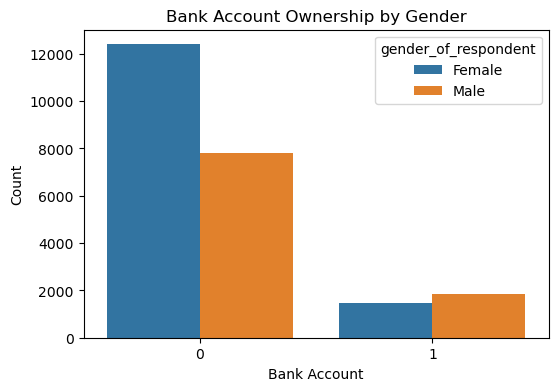

In [31]:
# 1. Countplot: Bank account ownership by gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="bank_account", hue="gender_of_respondent")
plt.title("Bank Account Ownership by Gender")
plt.xlabel("Bank Account")
plt.ylabel("Count")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_11708\3594938268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_of_respondent'] = pd.to_numeric(df['age_of_respondent'], errors='coerce')


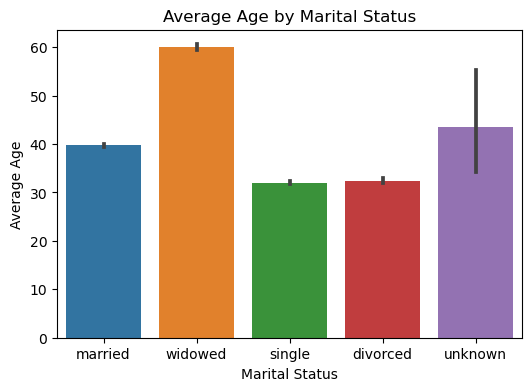

In [32]:
# ensure numeric (optional but good)
df['age_of_respondent'] = pd.to_numeric(df['age_of_respondent'], errors='coerce')

plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x="marital_status",
    y="age_of_respondent",
    estimator=np.mean        # <- use a callable, not "mean"
)
plt.title("Average Age by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Age")
plt.show()

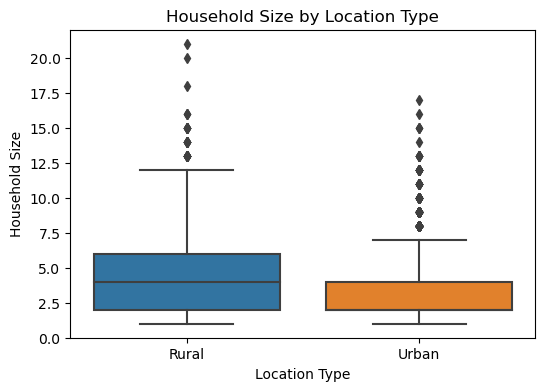

In [33]:
# 3. Boxplot: Household size distribution by location type
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="location_type", y="household_size")
plt.title("Household Size by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Household Size")
plt.show()

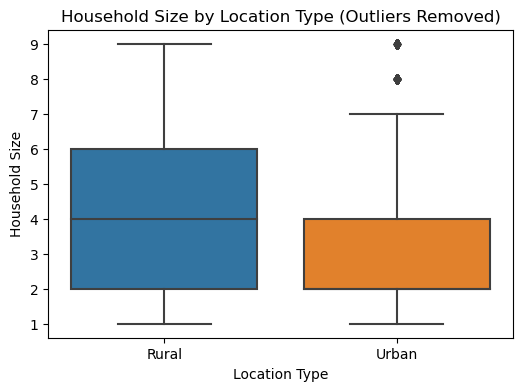

In [34]:


# IQR method for household_size
Q1 = df["household_size"].quantile(0.25)
Q3 = df["household_size"].quantile(0.75)
IQR = Q3 - Q1

# keep only non-outliers
df_no_outlier = df[
    (df["household_size"] >= Q1 - 1.5*IQR) &
    (df["household_size"] <= Q3 + 1.5*IQR)
]

# Boxplot without outliers
plt.figure(figsize=(6,4))
sns.boxplot(data=df_no_outlier, x="location_type", y="household_size")
plt.title("Household Size by Location Type (Outliers Removed)")
plt.xlabel("Location Type")
plt.ylabel("Household Size")
plt.show()


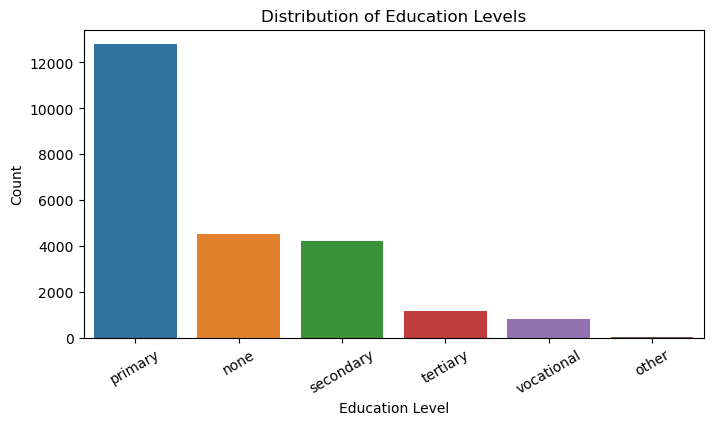

In [35]:
# 4. Countplot: Education levels
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="education_level", order=df["education_level"].value_counts().index)
plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

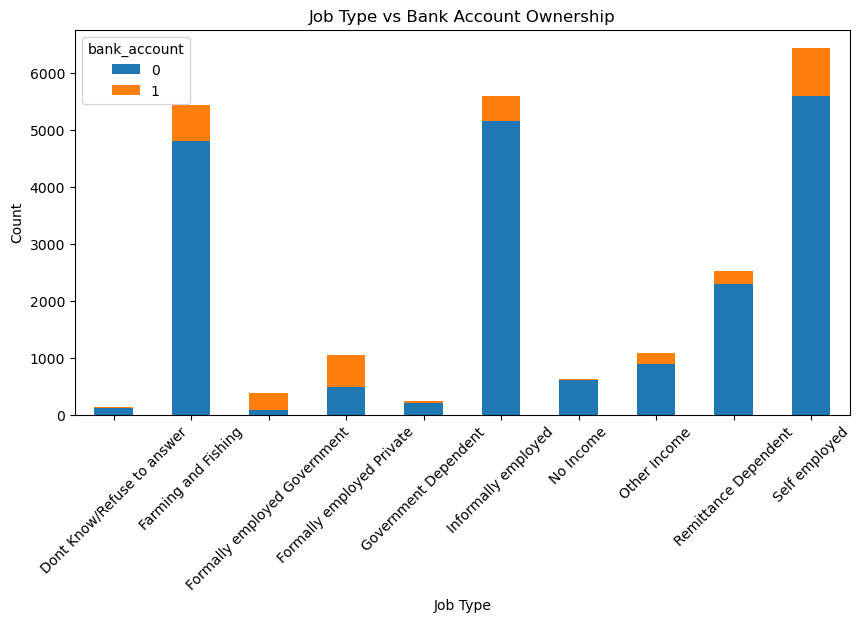

In [36]:
# 5. Stacked bar chart: Job type vs. Bank account
job_bank = pd.crosstab(df["job_type"], df["bank_account"])
job_bank.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Job Type vs Bank Account Ownership")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

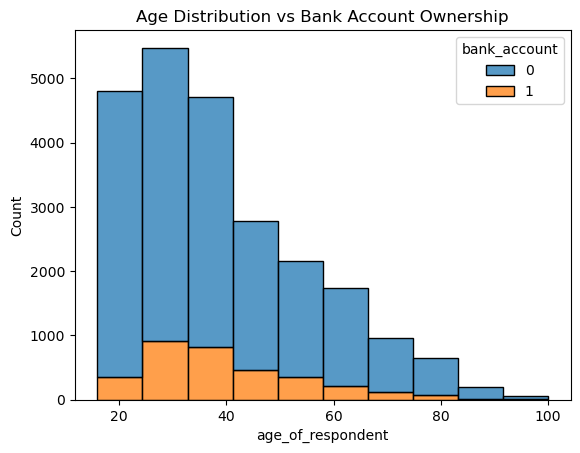

In [37]:
# 4. Age distribution by bank account ownership
# ----------------------
sns.histplot(data=df, x="age_of_respondent", hue="bank_account", multiple="stack", bins=10)
plt.title("Age Distribution vs Bank Account Ownership")
plt.show()


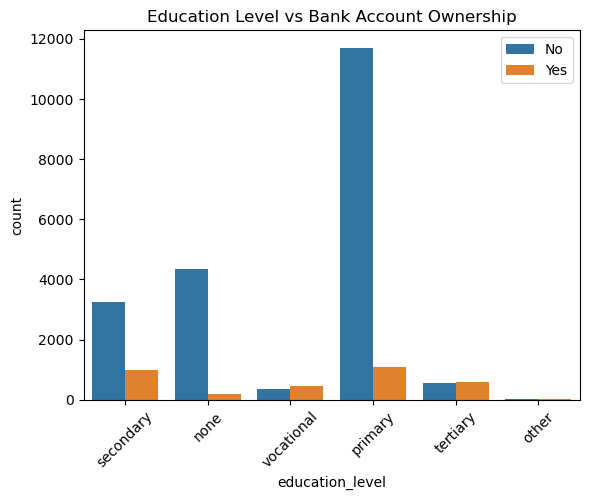

In [38]:
# 5. Education level vs bank account ownership
# ----------------------
sns.countplot(data=df, x="education_level", hue="bank_account")
plt.title("Education Level vs Bank Account Ownership")
plt.xticks(rotation=45)
plt.legend(labels=["No", "Yes"])
plt.show()

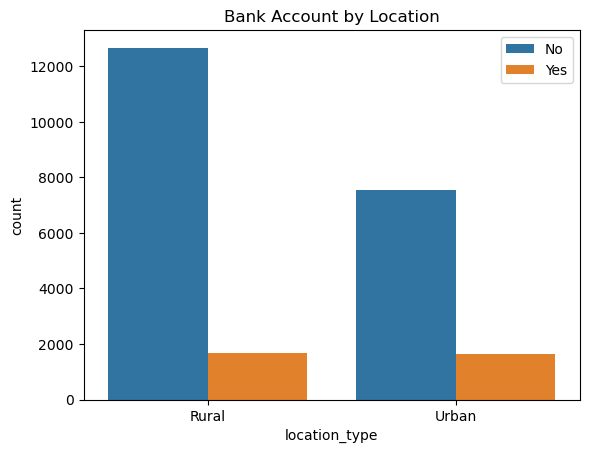

In [39]:
# 3. Bank account by location (Urban vs Rural)
# ----------------------
sns.countplot(data=df, x="location_type", hue="bank_account")
plt.title("Bank Account by Location")
plt.legend(labels=["No", "Yes"])
plt.show()

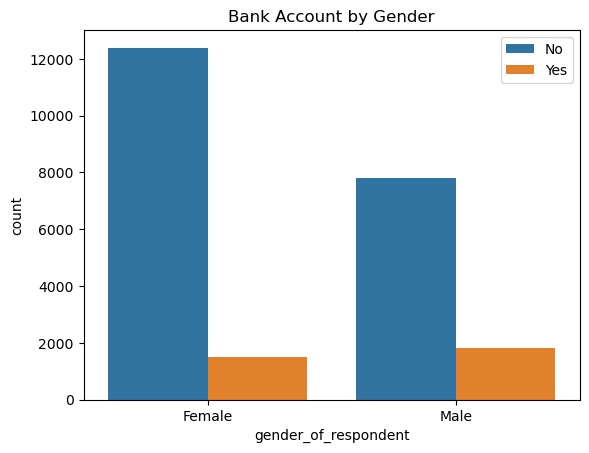

In [40]:
# 2. Bank account by gender
# ----------------------
sns.countplot(data=df, x="gender_of_respondent", hue="bank_account")
plt.title("Bank Account by Gender")
plt.legend(labels=["No", "Yes"])
plt.show()

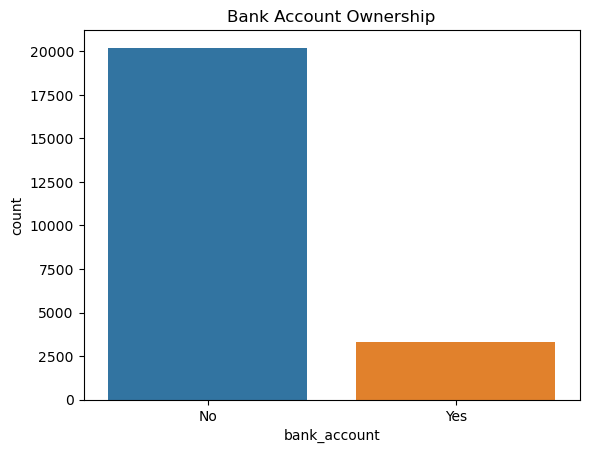

In [41]:
# 1. Bank account distribution
# ----------------------
sns.countplot(data=df, x="bank_account")
plt.title("Bank Account Ownership")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

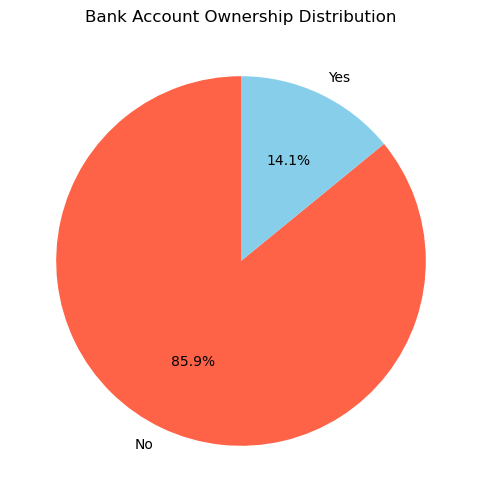

In [42]:
# Pie chart


# Count values
bank_counts = df["bank_account"].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    bank_counts,
    labels=["No", "Yes"],   # since 0=No, 1=Yes
    autopct='%1.1f%%',
    startangle=90,
    colors=["tomato", "skyblue"]
)
plt.title("Bank Account Ownership Distribution")
plt.show()


<Figure size 600x600 with 0 Axes>

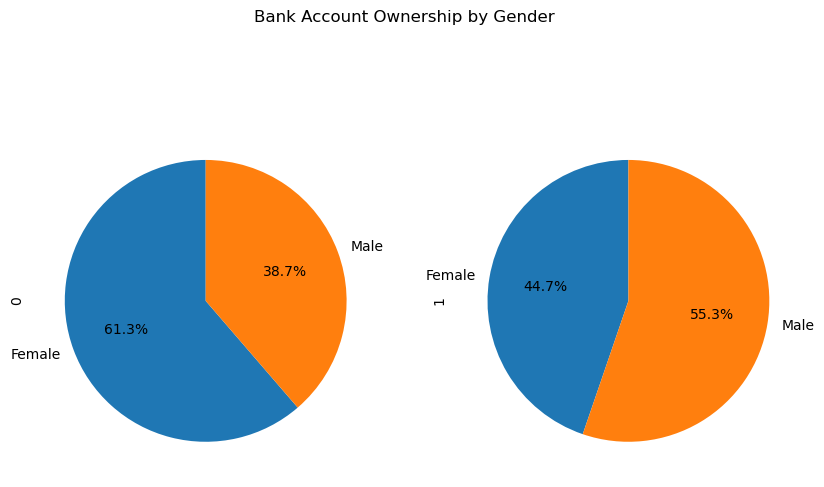

In [43]:
gender_counts = df.groupby("gender_of_respondent")["bank_account"].value_counts()

plt.figure(figsize=(6,6))
gender_counts.unstack().plot(
    kind="pie",
    subplots=True,
    autopct='%1.1f%%',
    startangle=90,
    figsize=(10,6),
    legend=False
)
plt.suptitle("Bank Account Ownership by Gender")
plt.show()


<Figure size 600x600 with 0 Axes>

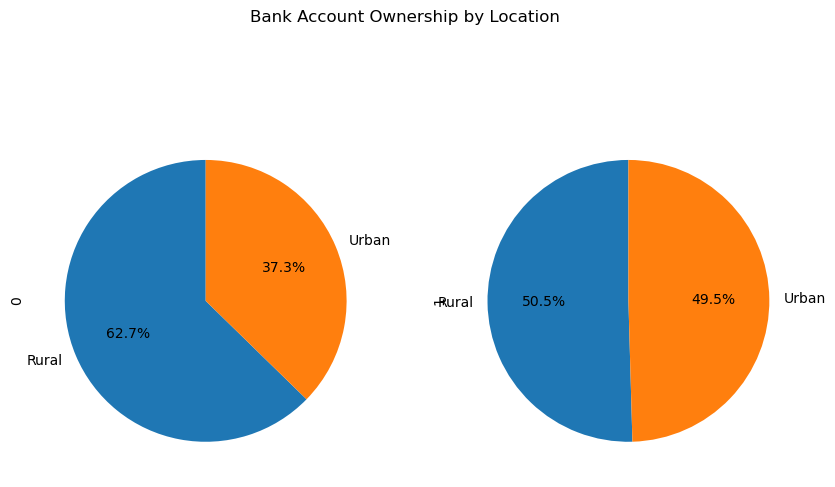

In [44]:
location_counts = df.groupby("location_type")["bank_account"].value_counts()

plt.figure(figsize=(6,6))
location_counts.unstack().plot(
    kind="pie",
    subplots=True,
    autopct='%1.1f%%',
    startangle=90,
    figsize=(10,6),
    legend=False
)
plt.suptitle("Bank Account Ownership by Location")
plt.show()


# Feature Engineering

In [45]:
# 2. Encode categorical columns
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


C:\Users\admin\AppData\Local\Temp\ipykernel_11708\865498175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\admin\AppData\Local\Temp\ipykernel_11708\865498175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\admin\AppData\Local\Temp\ipykernel_11708\865498175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [69]:
df


,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,1,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,2,5,9
3,0,2018,0,0,1,5,34,0,1,1,2,3
4,0,2018,0,1,0,8,26,1,0,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,0,0,1,4,48,0,1,0,0,7
23520,3,2018,0,0,1,2,27,0,1,2,3,7
23521,3,2018,0,0,1,5,27,0,4,4,2,7
23522,3,2018,0,1,1,7,30,0,4,0,3,9


In [47]:
# 2. Features (X) -> remove target
x = df.drop(columns=[ 'bank_account'], axis=1)
y = df['bank_account']

In [48]:
scaler = StandardScaler()
scaler

StandardScaler()

In [49]:
x_scale = scaler.fit_transform(x)
x_scale

array([[-1.29944427,  1.20854126, -0.80006449, ..., -0.56717287,
         0.83389097,  1.15462805],
       [-1.29944427,  1.20854126, -0.80006449, ...,  2.28229846,
        -1.65519051, -0.46420749],
       [-1.29944427,  1.20854126,  1.24989924, ...,  0.38265091,
         2.49327861,  1.15462805],
       ...,
       [ 1.94351424,  1.20854126, -0.80006449, ...,  2.28229846,
         0.00419714,  0.50709384],
       [ 1.94351424,  1.20854126,  1.24989924, ..., -1.51699664,
         0.83389097,  1.15462805],
       [ 1.94351424,  1.20854126, -0.80006449, ...,  0.38265091,
         0.83389097,  0.18332673]])

# Model Building

In [50]:
from sklearn.model_selection import train_test_split
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3, random_state=42)


In [51]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, auc, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import roc_curve

# logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [53]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression()

In [54]:
#y_pred = model_logistic.predict(scaled_X_test)
y_pred_train_LG = model_logistic.predict(X_train)
y_pred_test_lg = model_logistic.predict(X_test)
acc_train_3 = accuracy_score(y_train, y_pred_train_LG)
acc_test_3 = accuracy_score(y_test, y_pred_test_lg)


In [55]:
# Print classification report
print(classification_report(y_test, y_pred_test_lg))
print("Training Accuracy Score",acc_train_3)
print("Testing Accuracy Score",acc_test_3)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6073
           1       0.67      0.23      0.34       985

    accuracy                           0.88      7058
   macro avg       0.78      0.61      0.64      7058
weighted avg       0.86      0.88      0.85      7058

Training Accuracy Score 0.8728895906716871
Testing Accuracy Score 0.8767356191555682


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Regularized RandomForest to reduce overfitting
clf_R = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=10,            # limit depth of each tree
    min_samples_split=10,    # minimum samples to split
    min_samples_leaf=5,      # minimum samples at leaf
    class_weight="balanced", # handle imbalance if present
    random_state=42
)

clf_R.fit(X_train, y_train)

# Predictions
y_pred_train_RF = clf_R.predict(X_train)
y_pred_test_rf = clf_R.predict(X_test)

# Accuracy
acc_train_3 = accuracy_score(y_train, y_pred_train_RF)
acc_test_3 = accuracy_score(y_test, y_pred_test_rf)

# Print classification report
print(classification_report(y_test, y_pred_test_rf))
print("Training Accuracy Score", acc_train_3)
print("Testing Accuracy Score", acc_test_3)


              precision    recall  f1-score   support

           0       0.95      0.82      0.88      6073
           1       0.40      0.73      0.52       985

    accuracy                           0.81      7058
   macro avg       0.67      0.77      0.70      7058
weighted avg       0.87      0.81      0.83      7058

Training Accuracy Score 0.8310457913275842
Testing Accuracy Score 0.8092944176820629


# SVM

In [58]:
from sklearn.svm import SVC


clf_SVC = SVC(kernel="rbf", probability=True, random_state=42)
clf_SVC.fit(X_train, y_train)

y_pred_train = clf_SVC.predict(X_train)
y_pred_test = clf_SVC.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))
print("Training Accuracy Score", acc_train)
print("Testing Accuracy Score", acc_test)


              precision    recall  f1-score   support

           0       0.89      0.98      0.94      6073
           1       0.72      0.26      0.38       985

    accuracy                           0.88      7058
   macro avg       0.80      0.62      0.66      7058
weighted avg       0.87      0.88      0.86      7058

Training Accuracy Score 0.8834568201141747
Testing Accuracy Score 0.8826863134032303


# K-Nearest Neighbors

In [59]:
from sklearn.neighbors import KNeighborsClassifier


clf_K = KNeighborsClassifier(n_neighbors=5)
clf_K.fit(X_train, y_train)

y_pred_train = clf_K.predict(X_train)
y_pred_test = clf_K.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))
print("Training Accuracy Score", acc_train)
print("Testing Accuracy Score", acc_test)


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6073
           1       0.59      0.36      0.45       985

    accuracy                           0.88      7058
   macro avg       0.75      0.66      0.69      7058
weighted avg       0.86      0.88      0.86      7058

Training Accuracy Score 0.9010688691849873
Testing Accuracy Score 0.8763105695664494


# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf_D = DecisionTreeClassifier(max_depth=10, random_state=42)
clf_D.fit(X_train, y_train)

y_pred_train = clf_D.predict(X_train)
y_pred_test = clf_D.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))
print("Training Accuracy Score", acc_train)
print("Testing Accuracy Score", acc_test)


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6073
           1       0.60      0.34      0.43       985

    accuracy                           0.88      7058
   macro avg       0.75      0.65      0.68      7058
weighted avg       0.86      0.88      0.86      7058

Training Accuracy Score 0.907020527146848
Testing Accuracy Score 0.8760272031737036


# Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

clf_G = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
clf_G.fit(X_train, y_train)

y_pred_train = clf_G.predict(X_train)
y_pred_test = clf_G.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))
print("Training Accuracy Score", acc_train)
print("Testing Accuracy Score", acc_test)


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6073
           1       0.71      0.36      0.48       985

    accuracy                           0.89      7058
   macro avg       0.81      0.67      0.71      7058
weighted avg       0.88      0.89      0.87      7058

Training Accuracy Score 0.8932345439086603
Testing Accuracy Score 0.8903372060073675


# Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

clf_N = GaussianNB()
clf_N.fit(X_train, y_train)

y_pred_train = clf_N.predict(X_train)
y_pred_test = clf_N.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))
print("Training Accuracy Score", acc_train)
print("Testing Accuracy Score", acc_test)


              precision    recall  f1-score   support

           0       0.92      0.88      0.90      6073
           1       0.42      0.54      0.47       985

    accuracy                           0.83      7058
   macro avg       0.67      0.71      0.69      7058
weighted avg       0.85      0.83      0.84      7058

Training Accuracy Score 0.8307421353091218
Testing Accuracy Score 0.8323887786908473


In [63]:
!pip install xgboost

# XGBoost Classifier

In [64]:
!pip install xgboost

from xgboost import XGBClassifier

clf_X = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
clf_X.fit(X_train, y_train)

y_pred_train = clf_X.predict(X_train)
y_pred_test = clf_X.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))
print("Training Accuracy Score", acc_train)
print("Testing Accuracy Score", acc_test)


C:\Users\admin\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [08:27:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6073
           1       0.67      0.39      0.49       985

    accuracy                           0.89      7058
   macro avg       0.79      0.68      0.71      7058
weighted avg       0.87      0.89      0.87      7058

Training Accuracy Score 0.9181343374225677
Testing Accuracy Score 0.8872201756871635


# Bagging Classifier

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_B = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200, random_state=42)
clf_B.fit(X_train, y_train)

y_pred_train = clf_B.predict(X_train)
y_pred_test = clf_B.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))
print("Training Accuracy Score", acc_train)
print("Testing Accuracy Score", acc_test)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6073
           1       0.52      0.39      0.45       985

    accuracy                           0.86      7058
   macro avg       0.71      0.67      0.69      7058
weighted avg       0.85      0.86      0.86      7058

Training Accuracy Score 0.9818413700959553
Testing Accuracy Score 0.8642674978747521


# AdaBoost Classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_ADA = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=42)
clf_ADA.fit(X_train, y_train)

y_pred_train = clf_ADA.predict(X_train)
y_pred_test = clf_ADA.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))
print("Training Accuracy Score", acc_train)
print("Testing Accuracy Score", acc_test)


              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6073
           1       0.67      0.34      0.45       985

    accuracy                           0.88      7058
   macro avg       0.78      0.66      0.69      7058
weighted avg       0.87      0.88      0.87      7058

Training Accuracy Score 0.8841855945584841
Testing Accuracy Score 0.8841031453669594


In [67]:
import pickle

# Save the model to a file
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(clf_X, f)
